In [9]:
#Importing libraries
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv
import math

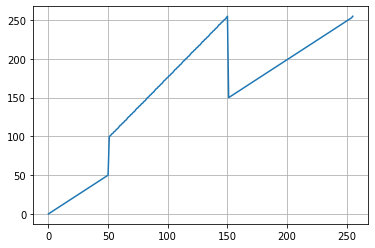

In [10]:
# q1
f1=cv.imread(r'./images/emma_gray.jpg',cv.IMREAD_GRAYSCALE) 
assert f1 is not None

t1=np.linspace(0,50,51)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,105)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.grid(True)
ax.plot(t)
plt.show()

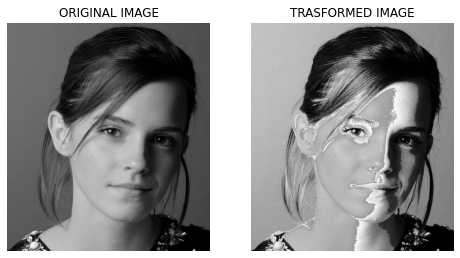

In [11]:
f1_it=cv.LUT(f1,t)

fig, ax =plt.subplots(1,2,figsize=(8,12)) 
ax[0].imshow(f1,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(f1_it,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("TRASFORMED IMAGE")
for i in range(2):
    ax[i].axis("off")
plt.show()

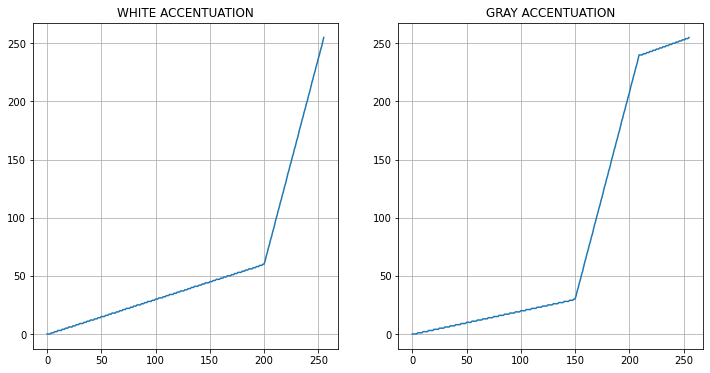

In [12]:
# q2
f2=cv.imread(r'images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE) 
assert f2 is not None

# white matter transformation
t_11=np.linspace(0,60,200)
t_12=np.linspace(60,255,56)

t_1=np.concatenate((t_11,t_12),axis=0).astype(np.uint8)

# Gray matter transformation
t_21=np.linspace(0,30,150)
t_22=np.linspace(30,240,60)
t_23=np.linspace(240,255,46)

t_2=np.concatenate((t_21,t_22,t_23),axis=0).astype(np.uint8)

fig, ax =plt.subplots(1,2,figsize=(12,6)) 
ax[0].plot(t_1)
ax[0].set_title("WHITE ACCENTUATION")

ax[1].plot(t_2)
ax[1].set_title("GRAY ACCENTUATION")
for i in range(2):
    ax[i].grid(True)
plt.show()

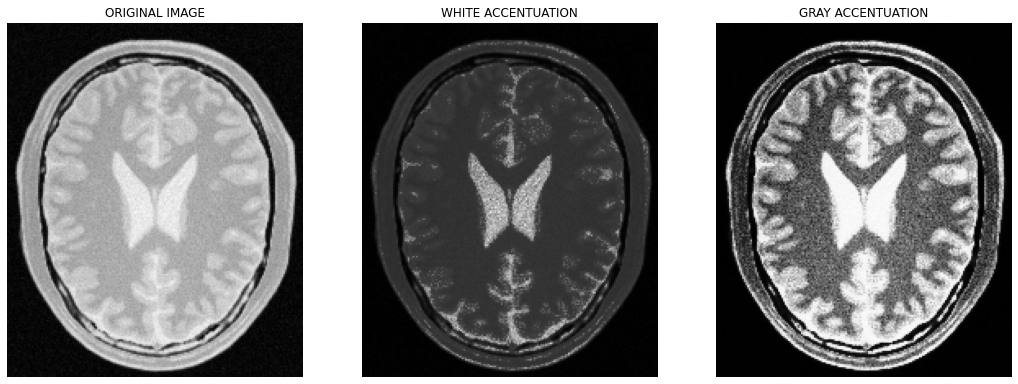

In [13]:
f2_itw=cv.LUT(f2,t_1)
f2_itg=cv.LUT(f2,t_2)

fig, ax =plt.subplots(1,3,figsize=(18,8)) 
ax[0].imshow(f2,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(f2_itw,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("WHITE ACCENTUATION")

ax[2].imshow(f2_itg,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("GRAY ACCENTUATION")
for i in range(3):
    ax[i].axis("off")
plt.show()

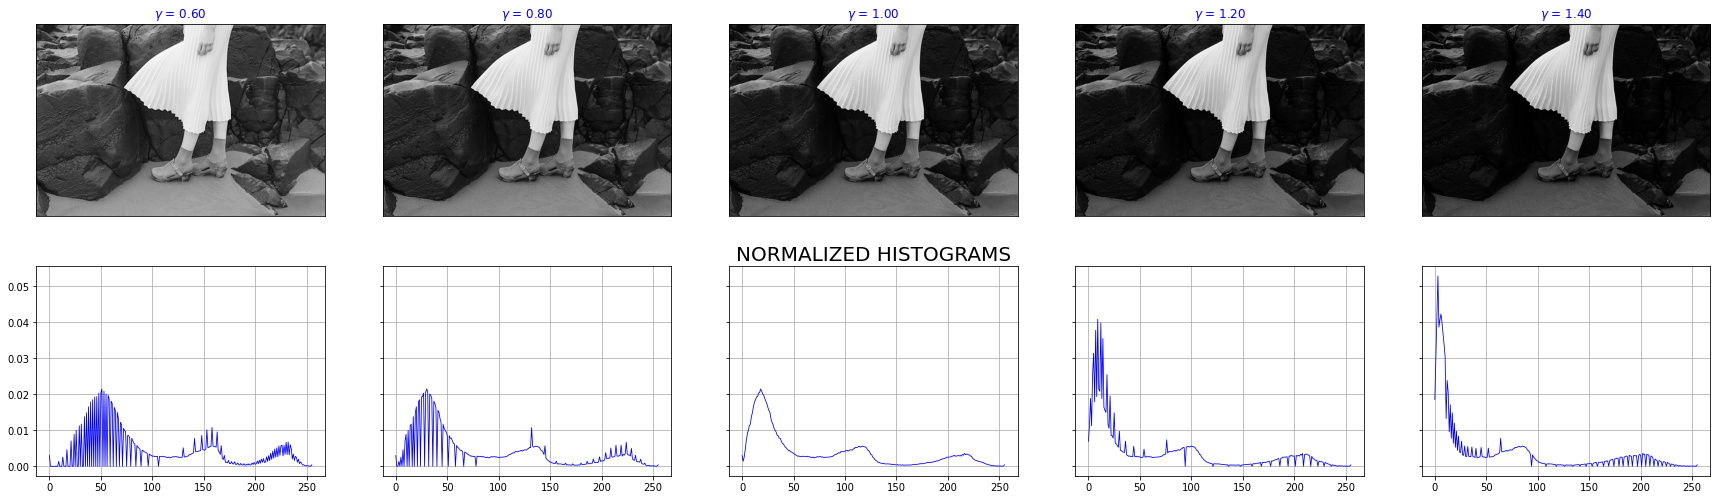

In [14]:
#q3
f3=cv.imread(r'images/highlights_and_shadows.jpg',cv.IMREAD_GRAYSCALE)
assert f3 is not None

gamma_list=[0.6,0.8,1,1.2,1.4]
fig, ax =plt.subplots(2,5,figsize=(30,16),sharey='row') 
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.2)
ax[1][2].set_title("NORMALIZED HISTOGRAMS",fontsize=20)


for (i,gamma) in enumerate(gamma_list):
    g_t=np.array([((p/255)**gamma)*255 for p in range (0,256)]).astype(np.uint8)
    g_c=cv.LUT(f3,g_t)
    
    ax[0][i%5].imshow(cv.cvtColor(g_c, cv.COLOR_BGR2RGB))
    ax[0][i%5].set_title(r"$\gamma$ = %0.2f"%gamma,color='blue')

    ax[0][i%5].set_xticks([])
    ax[0][i%5].set_yticks([])

    hist_g=cv.calcHist([g_c],[0],None,[256],[0,256])
    ax[1][i%5].plot(hist_g/np.sum(hist_g),color='blue',linewidth=0.8)
    ax[1][i%5].grid(True)


plt.show()

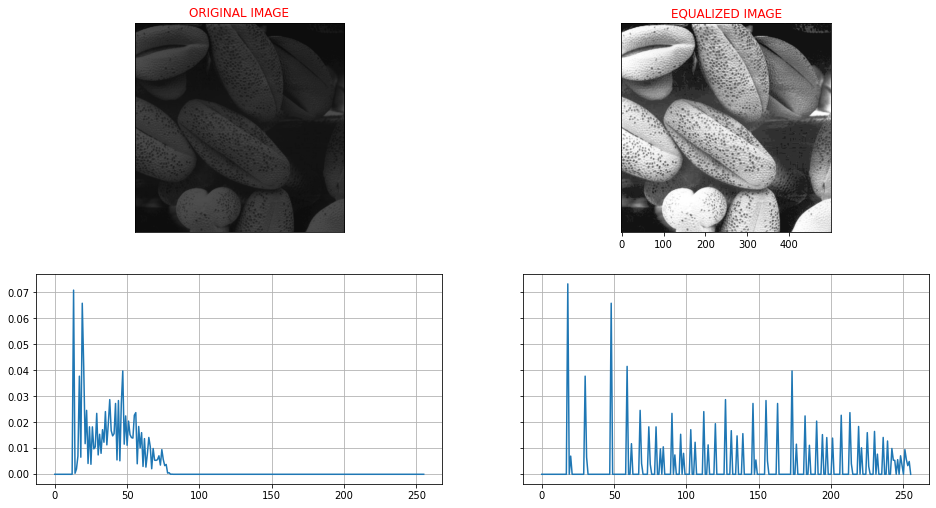

In [15]:
#q4
f4=cv.imread(r'images/shells.png',cv.IMREAD_GRAYSCALE)
assert f4 is not None

hist_f4=cv.calcHist([f4],[0],None,[256],[0,256])
pdf=hist_f4/np.sum(hist_f4)
cdf=np.cumsum(pdf)

t_equalization=255*cdf
f4_equalized=cv.LUT(f4,t_equalization)
hist_equalized=cv.calcHist([f4_equalized],[0],None,[256],[0,256])
pdf_equalized=hist_equalized/np.sum(hist_equalized)

fig, ax =plt.subplots(2,2,figsize=(16,16),sharey='row') 
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.2)

ax[0][0].imshow(f4,cmap='gray',vmin=0,vmax=255)
ax[0][0].set_title("ORIGINAL IMAGE",color="red")
ax[0][0].set_xticks([])

ax[0][1].imshow(f4_equalized,cmap='gray',vmin=0,vmax=255)
ax[0][1].set_title("EQUALIZED IMAGE",color="red")
ax[0][1].set_yticks([])

ax[1][0].plot(pdf)
ax[1][0].grid(True)

ax[1][1].plot(pdf_equalized)
ax[1][1].grid(True)

plt.show()



In [16]:
def zoom(image, scaling_factor, method):
    img = image
    sf = scaling_factor

    # DETERMINING DIAMENSIONS AND GENERATING AN EMPTY VERTOR TO STORE ZOOMED IMAGE
    if len(img.shape) == 2: 
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
    else:  
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
        zoomedImgDims[2] = 3
    # declaring an empty array to store values
    zoomedImg = np.zeros(zoomedImgDims, dtype=img.dtype)

# -------------------------  NEAREST NEIGHBOUR   ---------------------------------#
    if method == 'NN':
        for row in range(zoomedImg.shape[0]):
            source_row = min(round(row/sf), img.shape[0]-1)
            for column in range(zoomedImg.shape[1]):
                source_column = min(round(column/sf), img.shape[1]-1)

                #FOR GRAY IMAGE
                if len(img.shape) == 2:
                    zoomedImg[row][column] = img[source_row][source_column]
                
                #FOR COLOR IMAGE
                else:
                    for channel in range(3):
                        zoomedImg[row][column][channel] = \
                            img[source_row][source_column][channel]
# -------------------------BILINEAR INTERPOLATION---------------------------------#
    if method == 'BI':
        for row in range(zoomedImg.shape[0]):
            row_position = row/sf
            row_below = math.floor(row_position)
            row_up = min(math.ceil(row_position),img.shape[0]-1)
            for column in range(zoomedImg.shape[1]):
                column_position = column/sf
                column_previous = math.floor(column_position)
                column_next = min(math.ceil(column_position),img.shape[1]-1)
                delta_row = row_position - row_below
                delta_column = column_position - column_previous

                #FOR GRAY IMAGE
                if len(img.shape) == 2:  
                    interVal1 = img[row_below][column_previous]*(1-delta_row)\
                        + img[row_up][column_previous]*(delta_row)
                    interVal2 = img[row_below][column_next]*(1-delta_row)\
                        + img[row_up][column_next]*(delta_row)
                    zoomedImg[row][column] = (interVal1*(1-delta_column)
                                              + interVal2*(delta_column)).astype('uint8')
                #FOR COLOR IMAGE
                else:  
                    for channel in range(3):
                        interVal1 = img[row_below][column_previous][channel]*(1-delta_row)\
                            + img[row_up][column_previous][channel]*(delta_row)
                        interVal2 = img[row_below][column_next][channel]*(1-delta_row)\
                            + img[row_up][column_next][channel]*(delta_row)
                        zoomedImg[row][column][channel] = (interVal1*(1-delta_column)
                                                           + interVal2*(delta_column)).astype('uint8')
    return zoomedImg


In [58]:
#q5
f5_1s=cv.imread(r'images/im01small.png')
assert f5_1s is not None

f5_1=cv.imread(r'images/im01.png')
assert f5_1 is not None

f5_2s=cv.imread(r'images/im02small.png')
assert f5_2s is not None

f5_2=cv.imread(r'images/im02.png')
assert f5_2 is not None

f5_3s=cv.imread(r'images/im03small.png')
assert f5_3s is not None

f5_3=cv.imread(r'images/im03.png')
assert f5_3 is not None

In [18]:
#zooming images by the scale factor 4
zoom_im1_nn=zoom(f5_1s,4,"NN")
zoom_im2_nn=zoom(f5_2s,4,"NN")
zoom_im3_nn=zoom(f5_3s,4,"NN")

zoom_im1_bi=zoom(f5_1s,4,"BI")
zoom_im2_bi=zoom(f5_2s,4,"BI")
zoom_im3_bi=zoom(f5_3s,4,"BI")

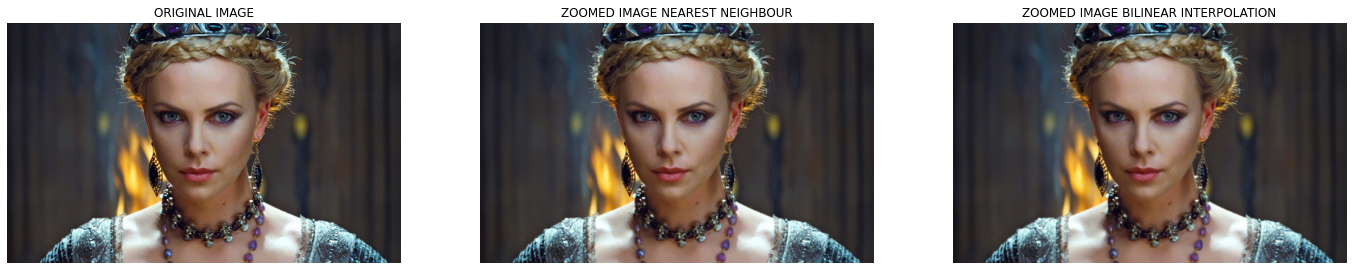

In [60]:
fig, ax =plt.subplots(1,3,figsize=(24,16)) 
ax[0].imshow(cv.cvtColor(f5_3, cv.COLOR_BGR2RGB))
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(cv.cvtColor(zoom_im3_nn, cv.COLOR_BGR2RGB))
ax[1].set_title("ZOOMED IMAGE NEAREST NEIGHBOUR")

ax[2].imshow(cv.cvtColor(zoom_im3_bi, cv.COLOR_BGR2RGB))
ax[2].set_title("ZOOMED IMAGE BILINEAR INTERPOLATION")
for i in range(3):
    ax[i].axis("off")
plt.show()

In [63]:
#COMPARING IMAGES
e1_nn = cv.norm(f5_1,zoom_im1_nn, cv.NORM_L2)
e1_bi = cv.norm(f5_1,zoom_im1_bi, cv.NORM_L2)
similarity_nn_1 = 1 - e1_nn/(f5_1.shape[0]*f5_1.shape[1])
similarity_bi_1 = 1 - e1_bi/(f5_1.shape[0]*f5_1.shape[1])
print('Similarity of the Image-I generated by Nearest-Neighbour method = ',similarity_nn_1)
print('Similarity of the Image-I generated by Bilinear-Interpolation method  = ',similarity_bi_1)

e2_nn = cv.norm(f5_2,zoom_im2_nn, cv.NORM_L2)
e2_bi = cv.norm(f5_2,zoom_im2_bi, cv.NORM_L2)
similarity_nn_2 = 1 - e2_nn/(f5_2.shape[0]*f5_2.shape[1])
similarity_bi_2 = 1 - e2_bi/(f5_2.shape[0]*f5_2.shape[1])
print('Similarity of the Image-II generated by Nearest-Neighbour method = ',similarity_nn_2)
print('Similarity of the Image-II generated by Bilinear-Interpolation method  = ',similarity_bi_2)


Similarity of the Image-I generated by Nearest-Neighbour method =  0.9807814826753325
Similarity of the Image-I generated by Bilinear-Interpolation method  =  0.9829792329588323
Similarity of the Image-II generated by Nearest-Neighbour method =  0.9908265144920814
Similarity of the Image-II generated by Bilinear-Interpolation method  =  0.9920155860234758


In [26]:
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    kernel_h, kernel_w = math.floor(
        kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    image_h, image_w = image.shape
    image_float = image.astype('float')
    filtered = np.zeros(image.shape, 'float')

    for i in range(kernel_h, image_h - kernel_h):
        for j in range(kernel_w, image_w - kernel_w):
            filtered[i, j] = np.dot(image_float[i - kernel_h: i + kernel_h + 1,
                                    j - kernel_w: j + kernel_w + 1].flatten(), kernel.flatten())

    return filtered

In [50]:
#q6
f6=cv.imread(r'images/einstein.png',cv.IMREAD_GRAYSCALE)
assert f6 is not None

kernel_v=np.array([(-1,-2,-1),(0,0,0),(1,2,1)],np.float32)
kernel_h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],np.float32)

f6_x=cv.filter2D(f6,-1,kernel_v)
f6_y=cv.filter2D(f6,-1,kernel_h)
f6_sobel=np.sqrt(f6_x**2+f6_y**2).astype(np.uint8)

#WITH OWN IMPLEMENTATION
f6_xo=filter(f6,kernel_v)
f6_yo=filter(f6,kernel_h)
f6_sobel_o=np.sqrt(f6_xo**2+f6_yo**2).astype(np.uint8)

#USING THE ASSOSIATIVE PROPERTY
kernel_v1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_v2 = np.array([[1], [2], [1]], dtype = np.float32)
kernel_h1 = np.array([1, 2, 1], dtype = np.float32)
kernel_h2 = np.array([[-1], [0], [1]], dtype = np.float32)

f6_x_=cv.filter2D(f6,-1,kernel_v1)
f6_x_=cv.filter2D(f6_x_,-1,kernel_v2)

f6_y_=cv.filter2D(f6,-1,kernel_h1)
f6_y_=cv.filter2D(f6_y_,-1,kernel_h2)


f6_sobel_asso=np.sqrt(f6_x_**2+f6_y_**2).astype(np.uint8)


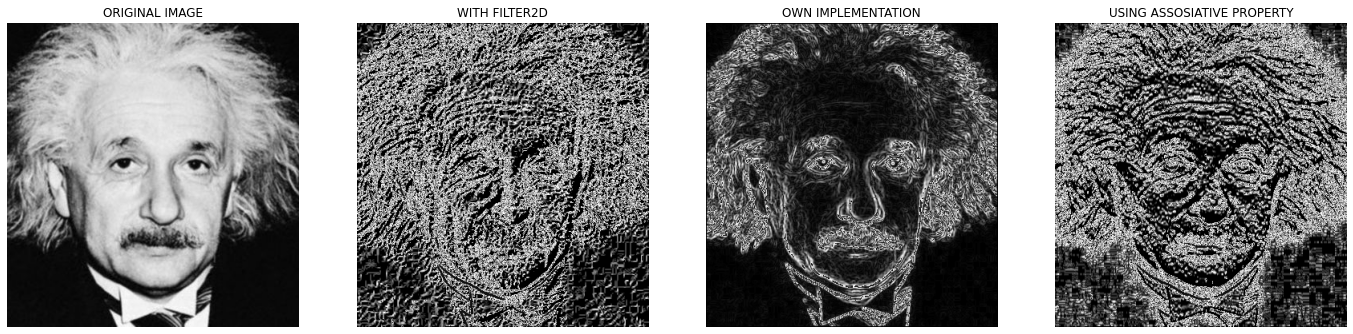

In [51]:
fig, ax=plt.subplots(1,4,figsize=(24,6))
ax[0].imshow(f6,cmap='gray')
ax[0].set_title("ORIGINAL IMAGE")
ax[1].imshow(f6_sobel,cmap='gray')
ax[1].set_title("WITH FILTER2D")
ax[2].imshow(f6_sobel_o,cmap='gray')
ax[2].set_title("OWN IMPLEMENTATION")
ax[3].imshow(f6_sobel_asso,cmap='gray')
ax[3].set_title("USING ASSOSIATIVE PROPERTY")
for i in range(4):
    ax[i].axis("off")

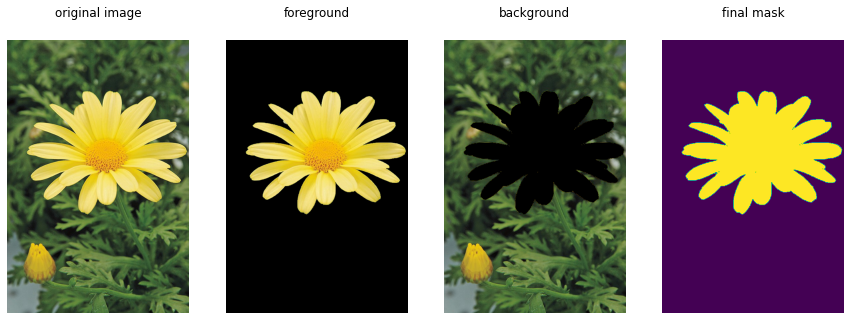

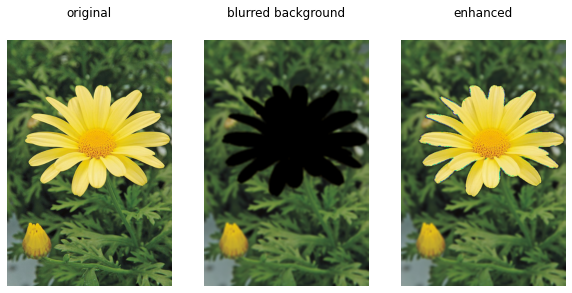

In [52]:
#7)
daisy = cv.imread(r'images\daisy.jpg', cv.IMREAD_COLOR)
assert daisy is not None
daisy_rgb = cv.cvtColor(daisy, cv.COLOR_BGR2RGB)

fig1, ax = plt.subplots(1,4, figsize=(15,10))
ax[0].imshow(daisy_rgb)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

#a)
mask = np.zeros(daisy_rgb.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (30,70,650,550)

cv.grabCut(daisy_rgb,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = daisy_rgb*mask2[:,:,np.newaxis]
back = daisy_rgb - fore

ax[1].imshow(fore)
ax[1].title.set_text('foreground')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(back)
ax[2].title.set_text('background')
ax[2].axis('off')
ax[2].xaxis.tick_top()

ax[3].imshow(mask2)
ax[3].title.set_text('final mask')
ax[3].axis('off')
ax[3].xaxis.tick_top()


#b)
fig2, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(daisy_rgb)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

blurred_bg = cv.GaussianBlur(back, (9,9), 4)
enhanced = fore + blurred_bg

ax[1].imshow(blurred_bg)
ax[1].title.set_text('blurred background')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(enhanced)
ax[2].title.set_text('enhanced')
ax[2].axis('off')
ax[2].xaxis.tick_top()

del daisy; del daisy_rgb; del fore; del back; del blurred_bg; del enhanced
del mask; del bgdModel; del fgdModel


7)
c) Because, when blurring the background using gaussian kernel, background just beyond the edge of the flower is affected by the neighboring  darker pixels contained in the flower.
In the background flower is replaced by the dark pixels.